In [1]:
import networkx as nx
from sqw.tesselations import even_cycle_two_tesselation, square_grid_tesselation
from sqw.plots import tesselation_plot, square_grid_plot
from sqw.states import uniform_initial_state, amp2prob
from sqw.statistics import states2std
import matplotlib.pyplot as plt
import numpy as np
from sqw.experiments_expanded import running
from sqw.plots import (final_distribution_plot, 
                       mean_plot, 
                       std_plot, 
                       ipr_plot, 
                       survival_plot)
import matplotlib.pyplot as plt
import time
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 

In [19]:
colormaps = [
    # Perceptually Uniform Sequential
    'viridis', 'plasma', 'inferno', 'magma',
    
    # Sequential
    'Blues', 'BuGn', 'BuPu', 'GnBu', 'Greens', 'Greys', 
    'Oranges', 'Purples', 'Reds', 'YlGn', 'YlGnBu', 
    'YlOrBr', 'YlOrRd',
    
    # Diverging
    'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 
    'RdBu', 'RdYlBu', 'RdYlGn', 'Spectral',
    
    # Cyclic
    'twilight', 'twilight_shifted', 'hsv',
    
    # Qualitative
    'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 
    'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c'
]



In [55]:
N = 100
steps = 20
G = nx.cycle_graph(N)

# Random edge weights
for u,v in G.edges():
    G.add_edge(u,v,weight = 0.4*np.random.random_sample())
    # G.add_edge(u,v,weight = 1.0)

    # G.add_edge(u,v,weight = 0.5*np.sin(u+v))
    # G.add_edge(u,v,weight = 1.0)


# Random self-loops weights
for u in G.nodes():
    # G.add_edge(u,u,weight = 1.0*np.random.random_sample())
    G.add_edge(u,u,weight = 1.0)


T = even_cycle_two_tesselation(N)
angles = [[2*np.pi, 2*np.pi]] * steps

# angles = [[np.pi/3, np.pi/3]] * steps
tesselation_order = [[0,1] for x in range(steps)]
initial_state = uniform_initial_state(N, nodes = [N//2, N//2+1])

states_adj = running(G, T, steps, 
                 initial_state, 
                 angles = angles, 
                 tesselation_order = tesselation_order,
                 matrix_representation='adjacency')

final_dist_adj = [amp2prob(a) for a in states_adj]

states_lap = running(G, T, steps, 
                 initial_state, 
                 angles = angles, 
                 tesselation_order = tesselation_order,
                 matrix_representation='laplacian')

final_dist_lap = [amp2prob(a) for a in states_lap]

##### 1 - Dynamic + Heatmap

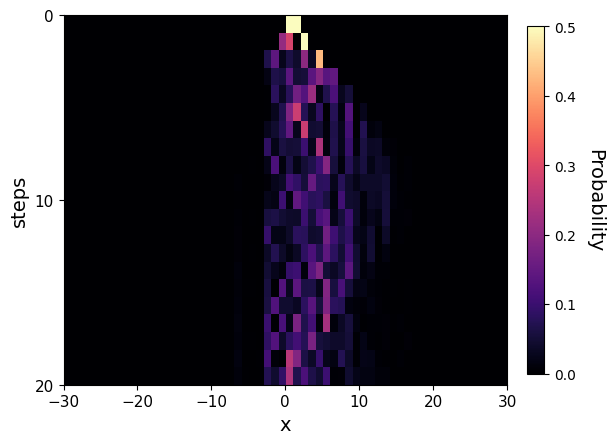

In [56]:
x = np.arange(-N//2, N//2, 1)
y = np.arange(0, steps, 1)
X, Y = np.meshgrid(x, y)

fig, ax = plt.subplots()

im = ax.imshow(final_dist_adj,interpolation='None',cmap=colormaps[3], extent = [-N//2, N//2, steps, 0])

ratio = 0.5
x_left, x_right = ax.get_xlim()
y_low, y_high = ax.get_ylim()
ax.set_aspect(abs((x_right-x_left)/(y_low-y_high))*ratio)
ax.set_xlabel('x',fontsize = 14)
ax.set_ylabel('steps',fontsize = 14)
ax.tick_params(axis='both', which='major', labelsize=11)

ax.set_xlim([-30,30])


ax.set_yticks(np.arange(0, steps+1, 10))
ax.set_xticks(np.arange(-30, 31, 10))

cbar = fig.colorbar(im,fraction=0.035, pad=0.04)
cbar.set_label('Probability', rotation=270,labelpad=20,fontsize = 14)


# plt.savefig(f'images/sqw_N{N}_t{steps}_thetapi3-pi3_init0.png',bbox_inches='tight',dpi=300)
plt.show()